# PROJET : ANALYSE DES DONNEES DE JO DE PARIS 2024

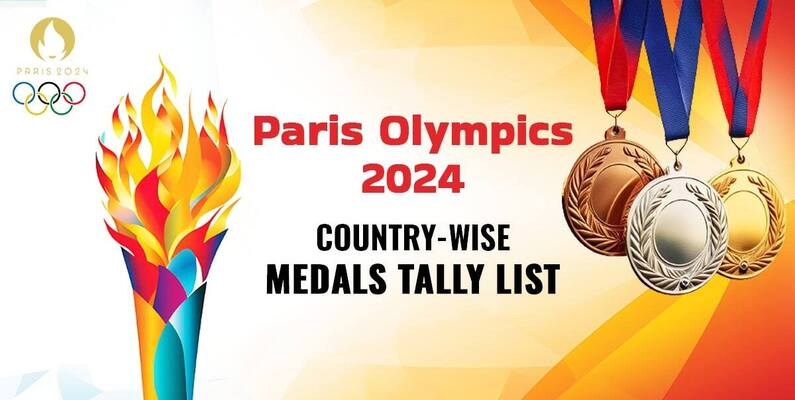

Pour analyser ce dataset des Jeux Olympiques de Paris, voici plusieurs axes d'analyse possibles :

### 1. **Distribution des médailles**
   - **Répartition des médailles par pays** : Analyser la proportion de médailles d'or, d'argent, et de bronze obtenues par chaque pays.
   - **Total des médailles par pays** : Comparer les pays en fonction du total des médailles remportées.

### 2. **Classement par types de médailles**
   - **Classement par médailles d'or** : Identifier les pays avec le plus de médailles d'or.
   - **Classement par médailles d'argent** : Identifier les pays avec le plus de médailles d'argent.
   - **Classement par médailles de bronze** : Identifier les pays avec le plus de médailles de bronze.

### 3. **Comparaison des performances**
   - **Ratio médailles d'or sur total des médailles** : Analyser l'efficacité de chaque pays à remporter des médailles d'or.
   - **Ratio médailles d'argent sur total des médailles** : Analyser l'efficacité pour les médailles d'argent.
   - **Ratio médailles de bronze sur total des médailles** : Analyser l'efficacité pour les médailles de bronze.

### 4. **Visualisations**
   - **Bar charts** pour représenter le nombre de médailles par type et par pays.
   - **Pie charts** pour la répartition des médailles par pays.
   - **Stacked bar charts** pour comparer visuellement les différents types de médailles entre les pays.

### 5. **Analyse de la performance des pays hôtes**
   - **France (FRA)** : Comparer les performances de la France par rapport aux autres pays.

### 6. **Statistiques descriptives**
   - **Médiane et moyenne des médailles** : Pour chaque type de médaille et pour le total des médailles.

### 7. **Évolution de la performance**
   - **Performance relative** : Analyser si certains pays ont une proportion significativement plus élevée de médailles d'or par rapport aux autres types de médailles.

### 8. **Analyse de corrélation**
   - **Corrélation entre les différents types de médailles** : Par exemple, la relation entre le nombre de médailles d'or et le nombre total de médailles.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv("data/parisOlympics.csv")
df.head()

,Position,Country,Gold,Silver,Bronze,Total Medals
0,1,United States (USA),40,44,43,127
1,2,China (CHN),40,27,24,91
2,3,Japan (JPN),20,12,13,45
3,4,Australia (AUS),18,19,16,53
4,5,France (FRA),16,26,22,64


# Exploratory Data Analysis

### Data Comprehension

- **Position**: Classement du pays
- **Country**: Nom du pays
- **Gold**: Nombre de medailles d'or
- **Silver**: Nombre de medailles d'argent
- **Bronze**: Nombre de medialles de bronze
- **Total Medals**: Nombre total de medailles obtenues

In [4]:
# Informations generales sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Position      90 non-null     int64 
 1   Country       90 non-null     object
 2   Gold          90 non-null     int64 
 3   Silver        90 non-null     int64 
 4   Bronze        90 non-null     int64 
 5   Total Medals  90 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.3+ KB


In [5]:
# Statistiques descriptives generales
df.describe()

,Position,Gold,Silver,Bronze,Total Medals
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,3.644444,3.622222,4.288889,11.555556
std,26.124701,7.017332,6.803135,6.638743,19.843835
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,23.250000,0.000000,0.000000,1.000000,2.000000
50%,45.500000,1.000000,1.000000,2.000000,5.000000
75%,67.750000,3.000000,3.000000,5.000000,9.000000
max,90.000000,40.000000,44.000000,43.000000,127.000000


In [4]:
# Detection des valeurs dupliquees 
df.duplicated().sum()

0

# 1. **Distribution des médailles**
   - **Répartition des médailles par pays** : Analyser la proportion de médailles d'or, d'argent, et de bronze obtenues par chaque pays.
   - **Total des médailles par pays** : Comparer les pays en fonction du total des médailles remportées.


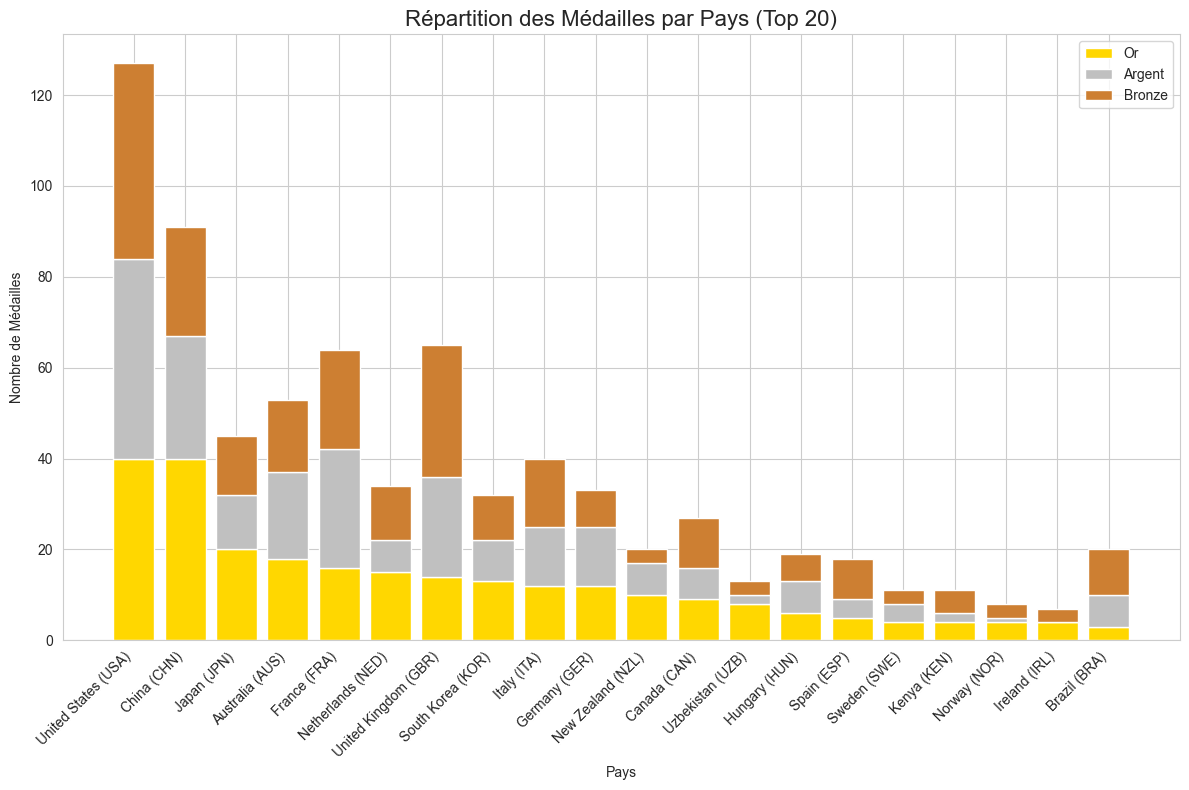

In [19]:
# Préparation des données pour empilage
df_top = df.head(20)
countries = df_top['Country']
gold = df_top['Gold']
silver = df_top['Silver']
bronze = df_top['Bronze']

# Position des barres
x = range(len(countries))

# Création de la figure
plt.figure(figsize=(12, 8))
plt.bar(x, gold, label='Or', color='#FFD700')
plt.bar(x, silver, bottom=gold, label='Argent', color='#C0C0C0')
plt.bar(x, bronze, bottom=gold + silver, label='Bronze', color='#CD7F32')

# Titres et légendes
plt.title("Répartition des Médailles par Pays (Top 20)", fontsize=16)
plt.xlabel("Pays")
plt.ylabel("Nombre de Médailles")
plt.xticks(ticks=x, labels=countries, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

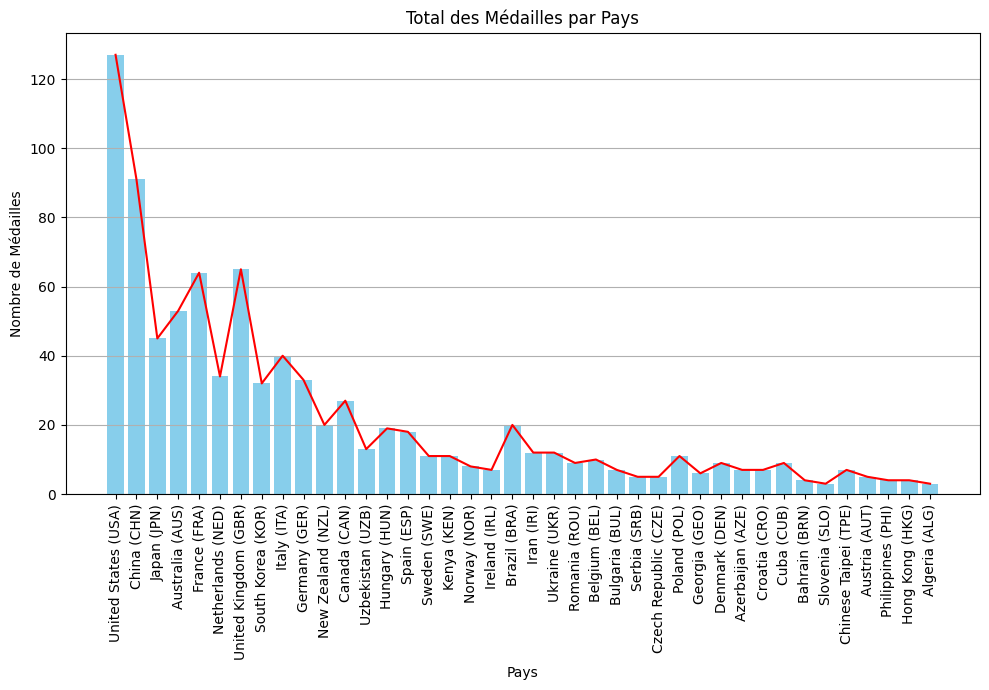

In [8]:
# Total des medailles par pays
import matplotlib.pyplot as plt

# Sélection des 40 premiers pays et leurs médailles
subset = df[['Country', 'Total Medals']].head(40)

# Création du graphique
plt.figure(figsize=(10, 7))
plt.bar(subset['Country'], subset['Total Medals'], color='skyblue')
plt.plot(subset['Country'], subset['Total Medals'], color='r')

# Personnalisation
plt.title("Total des Médailles par Pays")
plt.xlabel("Pays")
plt.ylabel("Nombre de Médailles")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')

plt.show()

### 2. **Classement par types de médailles**
   - **Classement par médailles d'or** : Identifier les pays avec le plus de médailles d'or.
   - **Classement par médailles d'argent** : Identifier les pays avec le plus de médailles d'argent.
   - **Classement par médailles de bronze** : Identifier les pays avec le plus de médailles de bronze.


In [10]:
gold_rank = df.sort_values(by='Gold', ascending=False)[['Country', 'Gold']].reset_index(drop=True)
silver_rank = df.sort_values(by='Silver', ascending=False)[['Country', 'Silver']].reset_index(drop=True)
bronze_rank = df.sort_values(by='Bronze', ascending=False)[['Country', 'Bronze']].reset_index(drop=True)

print(f"Pays avec le plus de médailles d'or: \n\n {gold_rank}")
print("\n\n")

print(f"Pays avec le plus de médailles d'argent: \n\n {silver_rank}")
print("\n\n")

print(f"Pays avec le plus de médailles de bronze: \n\n {bronze_rank}")


Pays avec le plus de médailles d'or: 

                 Country  Gold
0   United States (USA)    40
1           China (CHN)    40
2           Japan (JPN)    20
3       Australia (AUS)    18
4          France (FRA)    16
..                  ...   ...
85       Colombia (COL)     0
86        Armenia (ARM)     0
87         Mexico (MEX)     0
88         Turkey (TUR)     0
89         Zambia (ZAM)     0

[90 rows x 2 columns]



Pays avec le plus de médailles d'argent: 

                  Country  Silver
0    United States (USA)      44
1            China (CHN)      27
2           France (FRA)      26
3   United Kingdom (GBR)      22
4        Australia (AUS)      19
..                   ...     ...
85       Hong Kong (HKG)       0
86     Philippines (PHI)       0
87         Austria (AUT)       0
88  Chinese Taipei (TPE)       0
89          Zambia (ZAM)       0

[90 rows x 2 columns]



Pays avec le plus de médailles de bronze: 

                  Country  Bronze
0    United States (USA)      

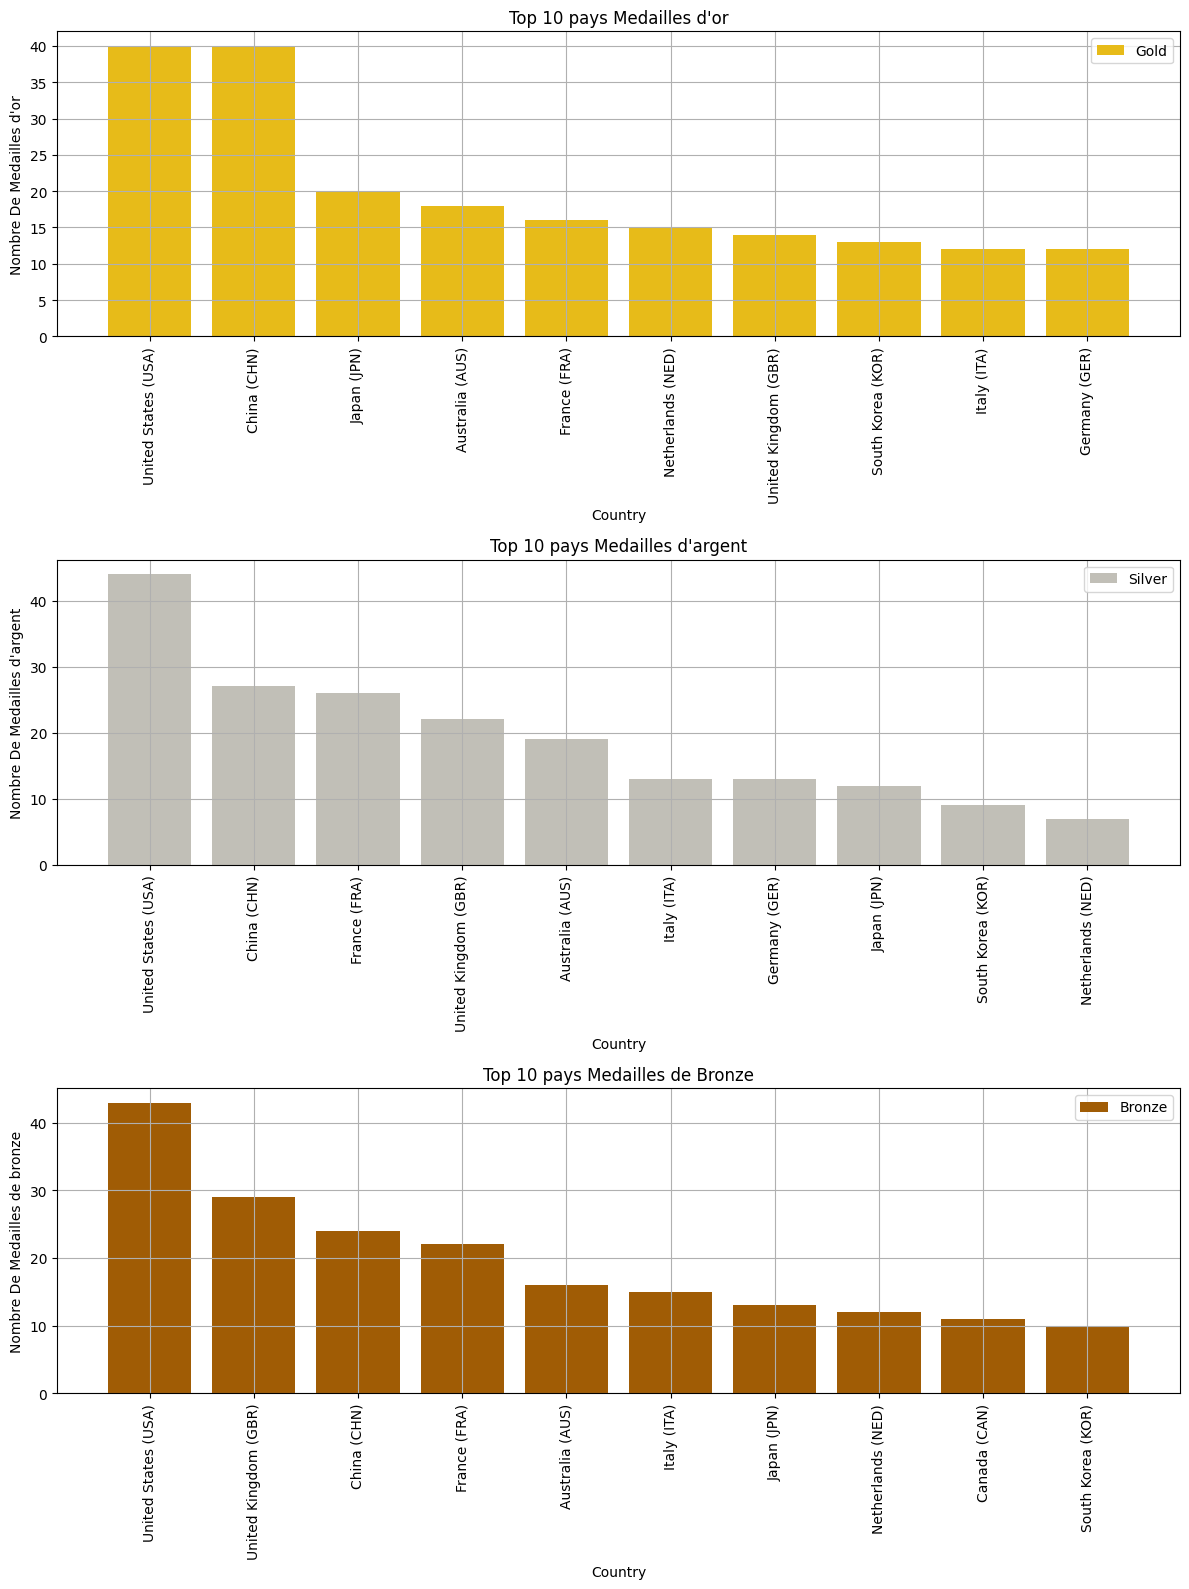

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 16))

# 1er sous-graphe : Médailles d'or
plt.subplot(3, 1, 1)
bars = plt.bar(gold_rank["Country"].head(10), gold_rank["Gold"].head(10), label="Gold", color="#e7bb19")
plt.xlabel("Country")
plt.ylabel("Nombre De Medailles d'or")
plt.xticks(rotation=90)
plt.title("Top 10 pays Medailles d'or")
plt.legend()
plt.grid(True)


# 2ème sous-graphe : Médailles d'argent
plt.subplot(3, 1, 2)
plt.bar(silver_rank["Country"].head(10), silver_rank["Silver"].head(10), label="Silver", color="#c1bfb7")
plt.xlabel("Country")
plt.ylabel("Nombre De Medailles d'argent")
plt.xticks(rotation=90)
plt.title("Top 10 pays Medailles d'argent")
plt.legend()
plt.grid(True)


# 3ème sous-graphe : Médailles de bronze
plt.subplot(3, 1, 3)
plt.bar(bronze_rank["Country"].head(10), bronze_rank["Bronze"].head(10), label="Bronze", color="#a05c05")
plt.xlabel("Country")
plt.ylabel("Nombre De Medailles de bronze")
plt.xticks(rotation=90)
plt.title("Top 10 pays Medailles de Bronze")
plt.legend()
plt.grid(True)

# Ajuster la mise en page
plt.tight_layout()

# Afficher tous les sous-graphes ensemble
plt.show()


### 3. **Comparaison des performances**
   - **Ratio médailles d'or sur total des médailles** : Analyser l'efficacité de chaque pays à remporter des médailles d'or.
   - **Ratio médailles d'argent sur total des médailles** : Analyser l'efficacité pour les médailles d'argent.
   - **Ratio médailles de bronze sur total des médailles** : Analyser l'efficacité pour les médailles de bronze.


In [11]:
# Ratio medaille d'or
df['Gold Ratio'] = df['Gold'] / df['Total Medals']
gold_ratio = df[['Country', 'Gold Ratio']].sort_values(by='Gold Ratio', ascending=False).reset_index(drop=True)
gold_ratio

# Ratio medaille d'argent
df['Silver Ratio'] = df['Silver'] / df['Total Medals']
silver_ratio = df[['Country', 'Silver Ratio']].sort_values(by='Silver Ratio', ascending=False).reset_index(drop=True)
silver_ratio

# Ratio medaille de bronze 
df['Bronze Ratio'] = df['Bronze'] / df['Total Medals']
bronze_ratio = df[['Country', 'Bronze Ratio']].sort_values(by='Bronze Ratio', ascending=False).reset_index(drop=True)
bronze_ratio

,Country,Bronze Ratio
0,Zambia (ZAM),1.0
1,Ivory Coast (CIV),1.0
2,Albania (ALB),1.0
3,Grenada (GRN),1.0
4,Malaysia (MAL),1.0
...,...,...
85,Chile (CHI),0.0
86,Saint Lucia (LCA),0.0
87,Uganda (UGA),0.0
88,Pakistan (PAK),0.0


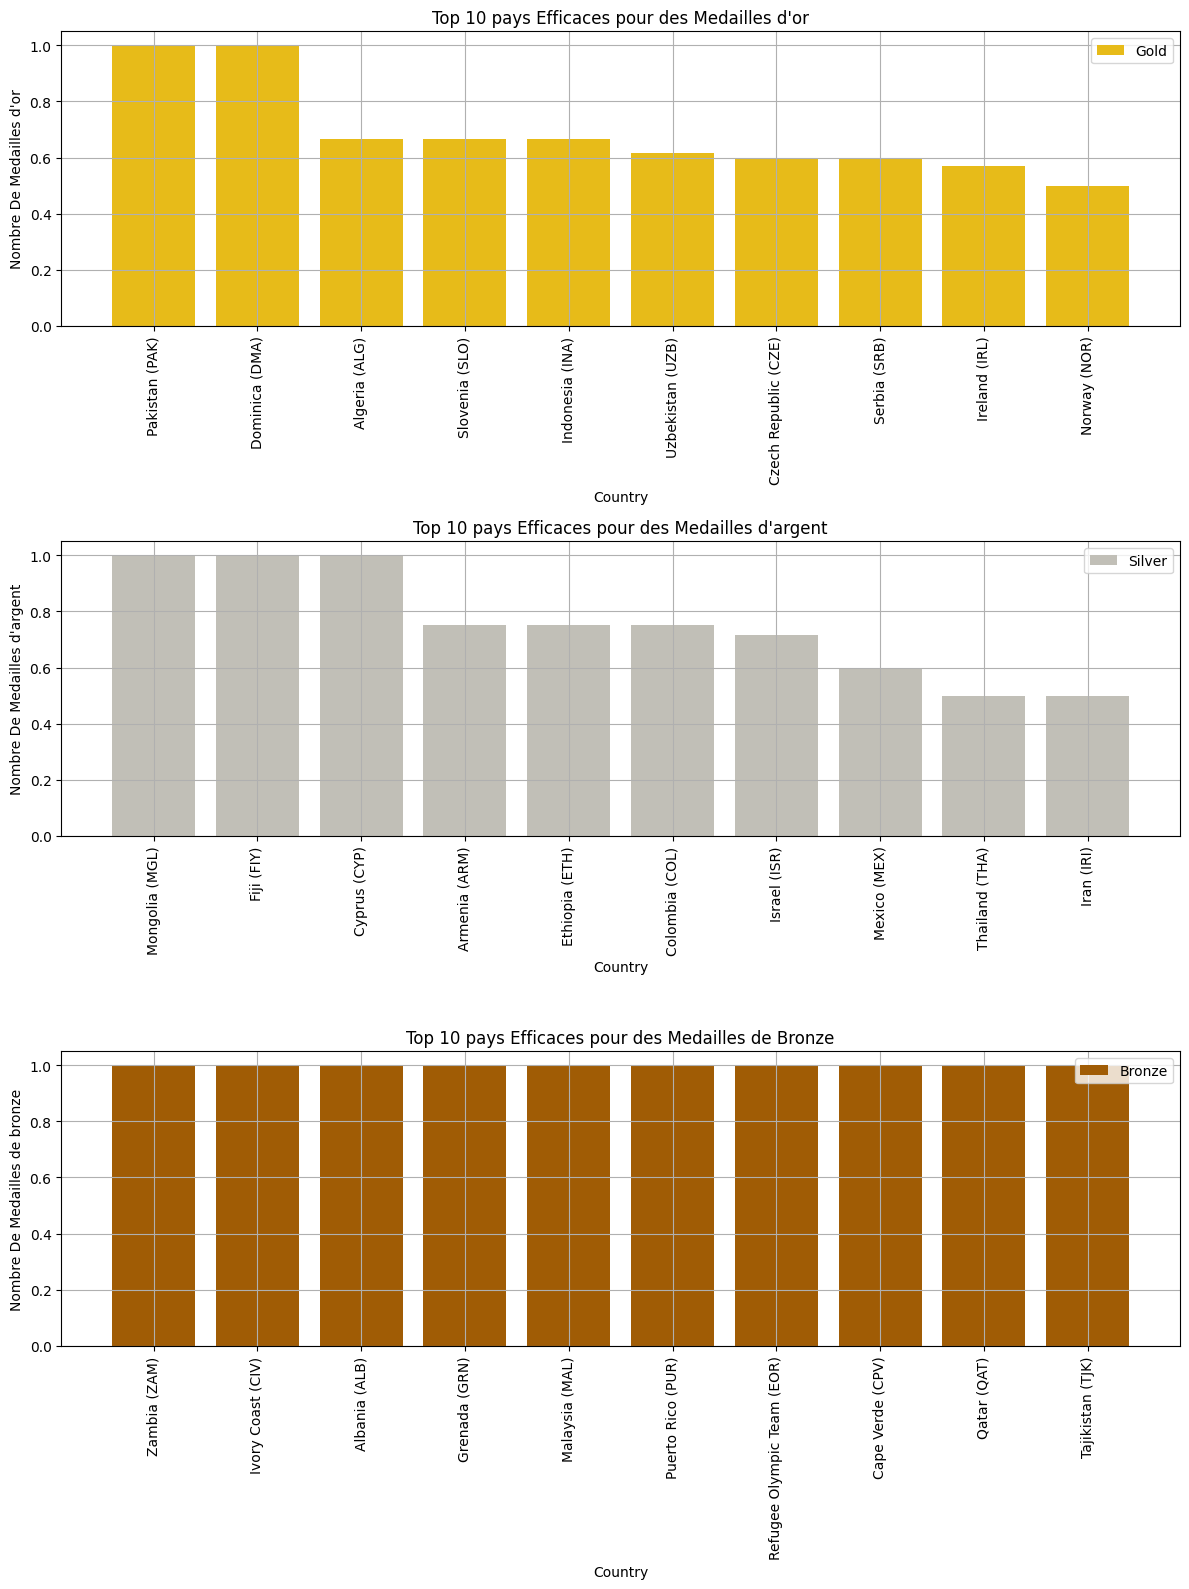

In [12]:
import matplotlib.pyplot as plt

# Supposons que gold_rank, silver_rank, et bronze_rank sont déjà définis

plt.figure(figsize=(12, 16))

# 1er sous-graphe : Médailles d'or
plt.subplot(3, 1, 1)
bars = plt.bar(gold_ratio["Country"].head(10), gold_ratio["Gold Ratio"].head(10), label="Gold", color="#e7bb19")
plt.xlabel("Country")
plt.ylabel("Nombre De Medailles d'or")
plt.xticks(rotation=90)
plt.title("Top 10 pays Efficaces pour des Medailles d'or")
plt.legend()
plt.grid(True)


# 2ème sous-graphe : Médailles d'argent
plt.subplot(3, 1, 2)
plt.bar(silver_ratio["Country"].head(10), silver_ratio["Silver Ratio"].head(10), label="Silver", color="#c1bfb7")
plt.xlabel("Country")
plt.ylabel("Nombre De Medailles d'argent")
plt.xticks(rotation=90)
plt.title("Top 10 pays Efficaces pour des Medailles d'argent")
plt.legend()
plt.grid(True)


# 3ème sous-graphe : Médailles de bronze
plt.subplot(3, 1, 3)
plt.bar(bronze_ratio["Country"].head(10), bronze_ratio["Bronze Ratio"].head(10), label="Bronze", color="#a05c05")
plt.xlabel("Country")
plt.ylabel("Nombre De Medailles de bronze")
plt.xticks(rotation=90)
plt.title("Top 10 pays Efficaces pour des Medailles de Bronze")
plt.legend()
plt.grid(True)

# Ajuster la mise en page
plt.tight_layout()

# Afficher tous les sous-graphes ensemble
plt.show()


### 5. **Analyse de la performance des pays hôtes**
   - **France (FRA)** : Comparer les performances de la France par rapport aux autres pays.

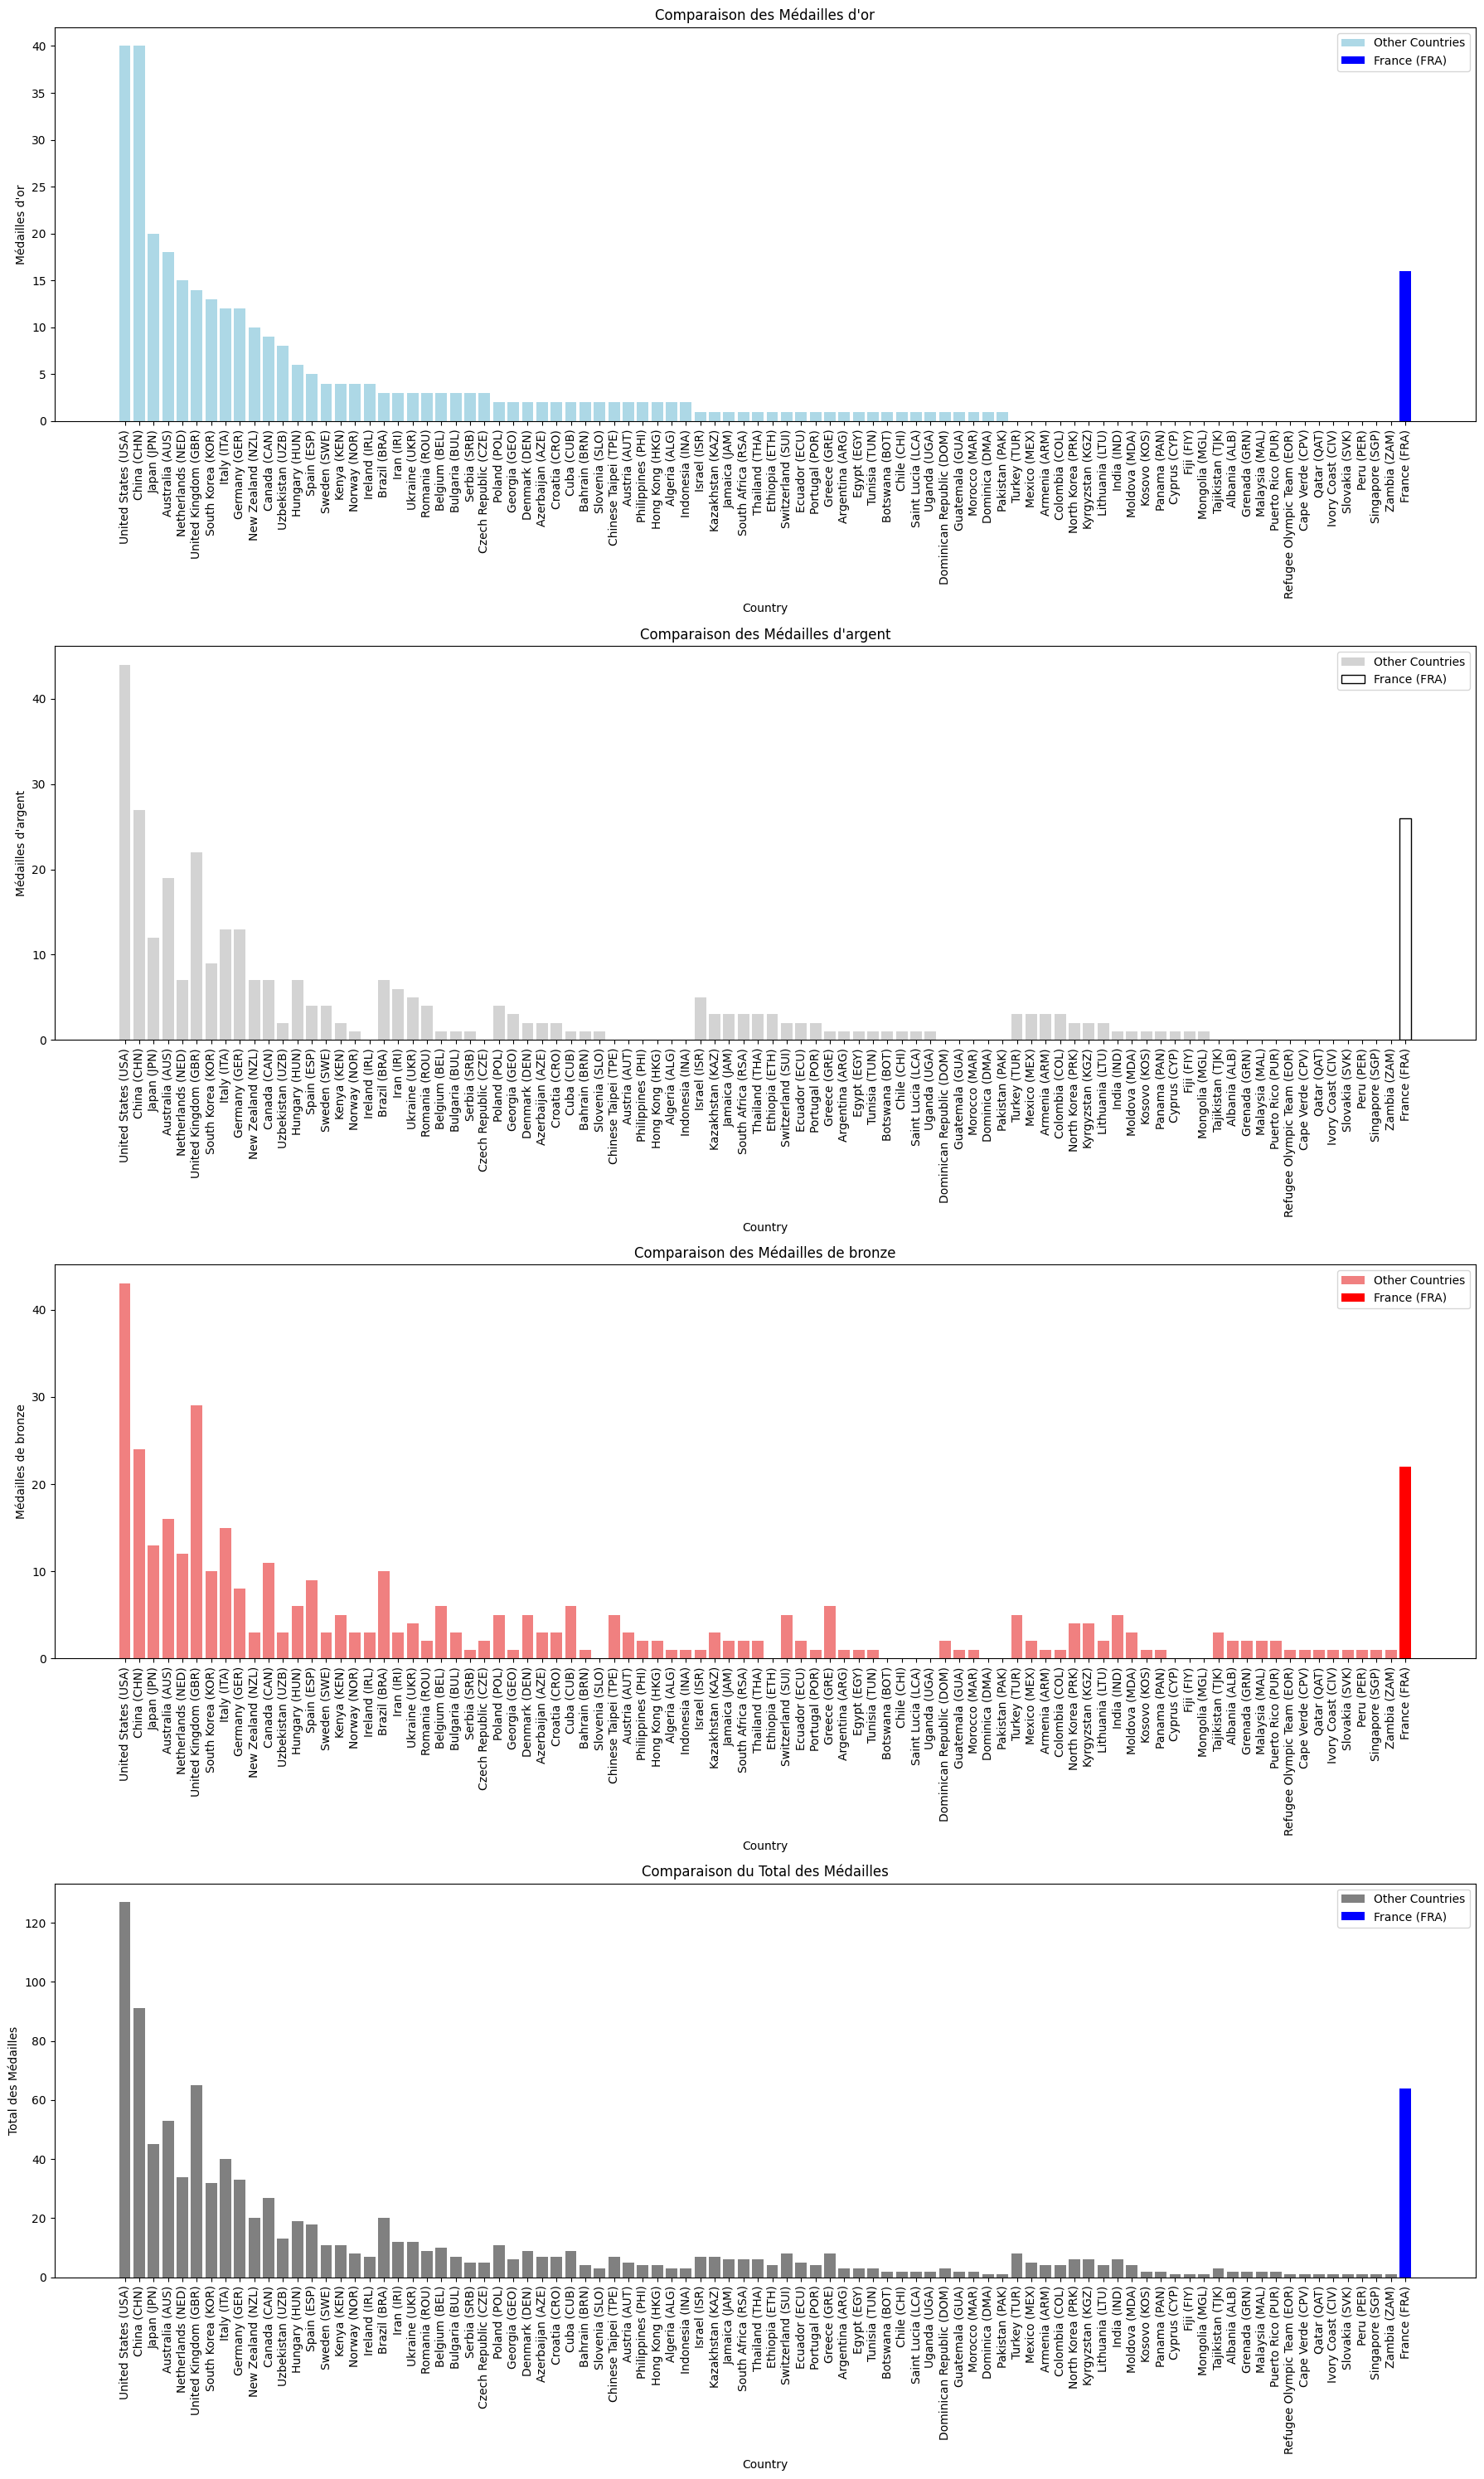

In [13]:
# Filtrer les données pour la France
france_data = df[df['Country'] == 'France (FRA)']

# Comparer avec les autres pays
other_countries_data = df[df['Country'] != 'France (FRA)']

# Créer une figure pour la visualisation
plt.figure(figsize=(18, 30))

# Comparaison des Médailles d'or (Bleu)
plt.subplot(4, 1, 1)
plt.bar(other_countries_data['Country'], other_countries_data['Gold'], label='Other Countries', color='lightblue')
plt.bar(france_data['Country'], france_data['Gold'], label='France (FRA)', color='blue')
plt.xlabel("Country")
plt.ylabel("Médailles d'or")
plt.xticks(rotation=90)
plt.title("Comparaison des Médailles d'or")
plt.legend()

# Comparaison des Médailles d'argent (Blanc ou Gris clair)
plt.subplot(4, 1, 2)
plt.bar(other_countries_data['Country'], other_countries_data['Silver'], label='Other Countries', color='lightgrey')
plt.bar(france_data['Country'], france_data['Silver'], label='France (FRA)', color='white', edgecolor='black')
plt.xlabel("Country")
plt.ylabel("Médailles d'argent")
plt.xticks(rotation=90)
plt.title("Comparaison des Médailles d'argent")
plt.legend()

# Comparaison des Médailles de bronze (Rouge)
plt.subplot(4, 1, 3)
plt.bar(other_countries_data['Country'], other_countries_data['Bronze'], label='Other Countries', color='lightcoral')
plt.bar(france_data['Country'], france_data['Bronze'], label='France (FRA)', color='red')
plt.xlabel("Country")
plt.ylabel("Médailles de bronze")
plt.xticks(rotation=90)
plt.title("Comparaison des Médailles de bronze")
plt.legend()

# Comparaison du Total des Médailles (Combinaison des couleurs)
plt.subplot(4, 1, 4)
plt.bar(other_countries_data['Country'], other_countries_data['Total Medals'], label='Other Countries', color='grey')
plt.bar(france_data['Country'], france_data['Total Medals'], label='France (FRA)', color='blue')
plt.xlabel("Country")
plt.ylabel("Total des Médailles")
plt.xticks(rotation=90)
plt.title("Comparaison du Total des Médailles")
plt.legend()

# Ajuster la mise en page et afficher
plt.tight_layout()
plt.show()


### 6. **Statistiques descriptives**
   - **Médiane et moyenne des médailles** : Pour chaque type de médaille et pour le total des médailles.

In [14]:
medals_stats = df[['Gold', 'Silver', 'Bronze', 'Total Medals']].agg(['mean', 'median'])
medals_stats

,Gold,Silver,Bronze,Total Medals
mean,3.644444,3.622222,4.288889,11.555556
median,1.000000,1.000000,2.000000,5.000000


Ces statistiques descriptives nous permettent de tirer plusieurs interprétations et conclusions concernant la distribution des médailles parmi les pays du dataset des Jeux Olympiques de Paris.

### Interprétations :

1. **Moyenne (Mean)** :
   - **Gold (3.64)** : En moyenne, les pays remportent environ 3 à 4 médailles d'or.
   - **Silver (3.62)** : Le nombre moyen de médailles d'argent par pays est très proche du nombre moyen de médailles d'or, soit environ 3 à 4 médailles.
   - **Bronze (4.29)** : En moyenne, les pays remportent légèrement plus de médailles de bronze par rapport aux médailles d'or et d'argent.
   - **Total Medals (11.56)** : En moyenne, un pays remporte environ 12 médailles au total.

2. **Médiane (Median)** :
   - **Gold (1.00)** : La médiane montre que la moitié des pays ont remporté au moins 1 médaille d'or. Cela signifie que beaucoup de pays remportent peu de médailles d'or.
   - **Silver (1.00)** : La médiane pour les médailles d'argent est également de 1, ce qui suggère que la distribution des médailles d'argent est similaire à celle des médailles d'or.
   - **Bronze (2.00)** : La médiane pour les médailles de bronze est de 2, ce qui signifie que la moitié des pays ont remporté au moins 2 médailles de bronze.
   - **Total Medals (5.00)** : La médiane du total des médailles est de 5, ce qui montre que la moitié des pays ont remporté 5 médailles ou moins.

### Conclusions :

1. **Distribution des Médailles** :
   - La moyenne des médailles est plus élevée que la médiane pour chaque type de médaille, ce qui indique une **distribution asymétrique**. Cela signifie qu'il y a quelques pays qui ont remporté un grand nombre de médailles, ce qui tire la moyenne vers le haut. Par exemple, des pays comme les États-Unis ou la Chine dominent probablement la distribution des médailles.
   - La médiane inférieure à la moyenne pour chaque type de médaille suggère qu'une grande partie des pays ont remporté un nombre relativement faible de médailles.

2. **Dominance de Certains Pays** :
   - L'écart entre la moyenne et la médiane montre qu'il y a probablement quelques pays très performants (comme les États-Unis, la Chine, etc.) qui ont remporté un nombre disproportionné de médailles, ce qui contraste avec une majorité de pays qui ont remporté peu de médailles.
   - Les pays qui se situent en dessous de la médiane ont peut-être besoin de renforcer leur préparation olympique pour améliorer leur performance future.

3. **Bronze Plus Répandu** :
   - La moyenne des médailles de bronze étant légèrement plus élevée que celle des médailles d'or et d'argent, on peut en conclure que les médailles de bronze sont plus réparties entre les pays, ce qui pourrait refléter une plus grande diversité de pays accédant à la troisième place sur le podium.

4. **Performance Globale Modeste** :
   - Étant donné que la médiane totale des médailles est de 5, il semble que la majorité des pays participants aux Jeux Olympiques de Paris remportent un nombre relativement modeste de médailles, avec quelques pays exceptionnels qui dominent le tableau des médailles.

Ces analyses montrent l'influence significative des grandes nations olympiques sur les résultats globaux, tout en soulignant la participation plus modeste d'une majorité de pays.

### 8. **Analyse de corrélation**
   - **Corrélation entre les différents types de médailles** : Par exemple, la relation entre le nombre de médailles d'or et le nombre total de médailles.


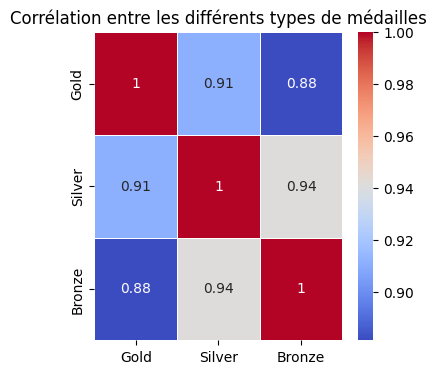

In [15]:
corr_matrix = df[['Gold', 'Silver', 'Bronze']].corr()
corr_matrix
# Heatmap pour visualiser les corrélations
plt.figure(figsize=(4, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Corrélation entre les différents types de médailles")
plt.show()

La matrice de corrélation fournie montre les coefficients de corrélation entre les médailles d'or, d'argent et de bronze. Chaque coefficient de corrélation mesure la force et la direction de la relation linéaire entre deux variables. Ces valeurs sont comprises entre -1 et 1 :

- **1** signifie une corrélation parfaitement positive (les variables augmentent ensemble).
- **0** signifie aucune corrélation (aucune relation linéaire).
- **-1** signifie une corrélation parfaitement négative (l'une augmente tandis que l'autre diminue).

### Matrice de Corrélation :
|         | Gold  | Silver | Bronze |
|---------|-------|--------|--------|
| **Gold**  | 1.000 | 0.911  | 0.882  |
| **Silver**| 0.911 | 1.000  | 0.941  |
| **Bronze**| 0.882 | 0.941  | 1.000  |

### Interprétations :

1. **Corrélation entre les Médailles d'Or et d'Argent (0.911)** :
   - Il y a une forte corrélation positive (0.911) entre le nombre de médailles d'or et d'argent. Cela signifie que les pays qui gagnent beaucoup de médailles d'or ont tendance à gagner aussi beaucoup de médailles d'argent.
  
2. **Corrélation entre les Médailles d'Or et de Bronze (0.882)** :
   - La corrélation positive (0.882) entre les médailles d'or et de bronze est également élevée, bien qu'un peu plus faible que celle avec les médailles d'argent. Cela signifie que les pays qui remportent de nombreuses médailles d'or gagnent également un nombre important de médailles de bronze, bien que l'association soit légèrement moins forte.
  
3. **Corrélation entre les Médailles d'Argent et de Bronze (0.941)** :
   - La corrélation la plus élevée est entre les médailles d'argent et de bronze (0.941), indiquant une très forte relation positive. Cela signifie que les pays qui gagnent beaucoup de médailles d'argent ont presque systématiquement un nombre élevé de médailles de bronze.

### Conclusions :

1. **Performance Globale** :
   - Les fortes corrélations entre les différents types de médailles suggèrent que les pays performants dans une catégorie de médailles (or, argent ou bronze) tendent à être performants dans les autres catégories également. Autrement dit, les pays qui ont une forte performance olympique sont souvent capables de remporter des médailles dans toutes les couleurs.

2. **Dominance de Certains Pays** :
   - Les pays les plus performants tendent à accumuler des médailles de tous types, ce qui pourrait indiquer une domination générale dans les compétitions, indépendamment du niveau de la médaille.

3. **Stratégie de Compétition** :
   - Une autre conclusion possible est que les pays qui investissent dans le sport de haut niveau et qui sont bien préparés ont une meilleure chance de remporter des médailles, qu'elles soient d'or, d'argent ou de bronze. Les fortes corrélations pourraient refléter les efforts globaux de ces pays dans la préparation et la compétition.

4. **Pas de Spécialisation Marquée** :
   - Les fortes corrélations entre les médailles suggèrent qu'il n'y a pas de spécialisation marquée dans une seule couleur de médaille. Par exemple, un pays ne se spécialise pas uniquement dans l'obtention des médailles d'or au détriment des médailles d'argent ou de bronze, mais tend à être compétitif globalement.

En résumé, ces corrélations indiquent que les performances olympiques sont globales et non spécifiques à un type de médaille, les pays les plus performants ayant tendance à exceller dans toutes les catégories de médailles.

# 7. Visualisations
a. **Pie Chart pour la Répartition des Médailles**

array([<Axes: ylabel='Gold'>, <Axes: ylabel='Silver'>,
       <Axes: ylabel='Bronze'>], dtype=object)

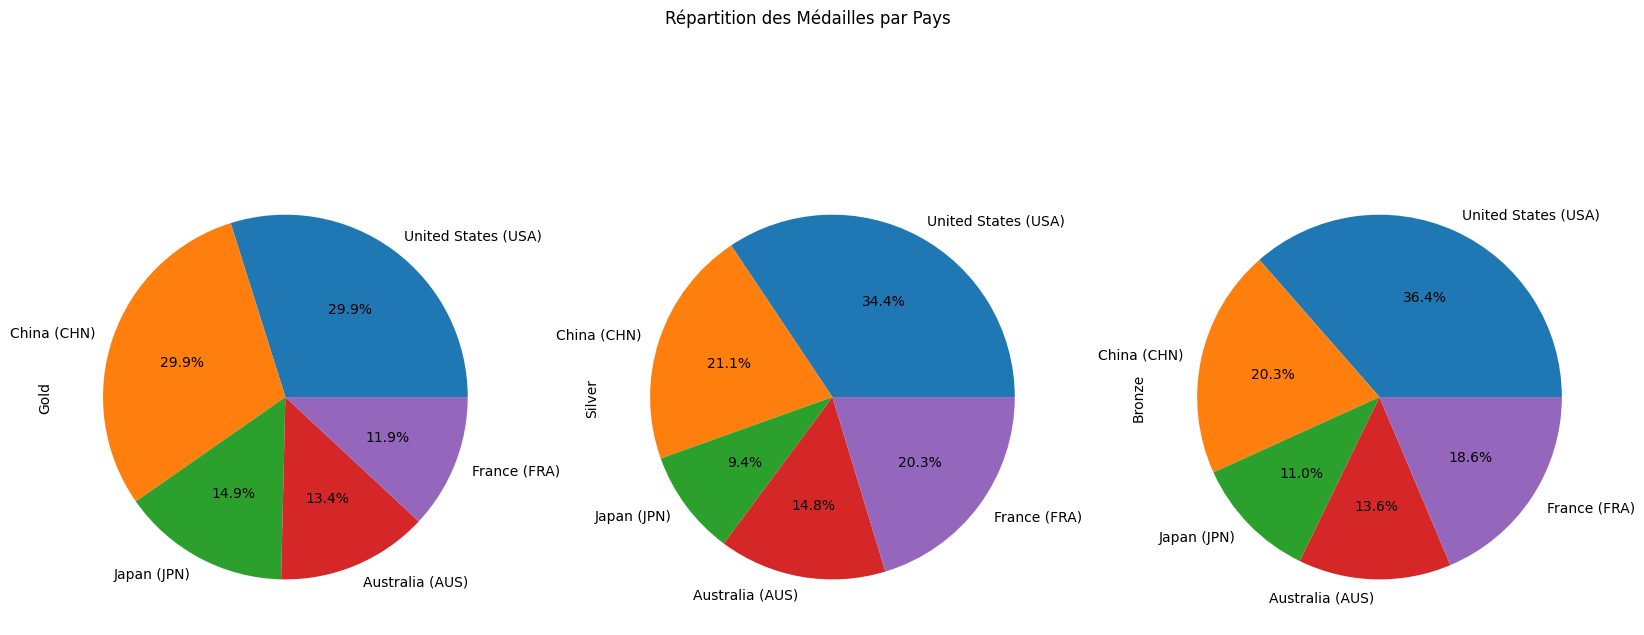

In [16]:

df.head(5).set_index('Country')[['Gold', 'Silver', 'Bronze']].plot(kind='pie', subplots=True, figsize=(20, 8), autopct='%1.1f%%', legend=False, title="Répartition des Médailles par Pays")
